<a href="https://colab.research.google.com/github/joaopcnogueira/colab-notebooks/blob/main/Time_Series_with_Darts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install darts

In [1]:
import pandas as pd
from darts import TimeSeries

In [6]:
# Read a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [8]:
# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df, 'Month', '#Passengers')

In [9]:
# Set aside the last 36 months as a validation series
train, val = series[:-36], series[-36:]

In [61]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
predictions = model.predict(len(val), num_samples=500)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:429: FutureWarning:

After 0.13 initialization must be handled at model creation



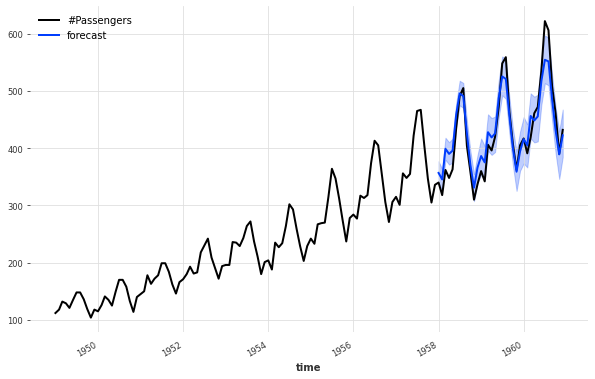

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
series.plot()
predictions.plot(label='forecast', low_quantile=0.05, high_quantile=0.95)
plt.legend();

In [85]:
predictions_df = predictions.quantiles_df(quantiles=[0.05, 0.5, 0.95])
predictions_df.head()

,#Passengers_0.05,#Passengers_0.5,#Passengers_0.95
time,,,
1958-01-01,<xarray.DataArray ()>\narray(338.79662406)\nCo...,<xarray.DataArray ()>\narray(356.78009231)\nCo...,<xarray.DataArray ()>\narray(377.20407348)\nCo...
1958-02-01,<xarray.DataArray ()>\narray(326.23868787)\nCo...,<xarray.DataArray ()>\narray(345.39354543)\nCo...,<xarray.DataArray ()>\narray(363.35381587)\nCo...
1958-03-01,<xarray.DataArray ()>\narray(379.78688327)\nCo...,<xarray.DataArray ()>\narray(399.01770371)\nCo...,<xarray.DataArray ()>\narray(418.25216704)\nCo...
1958-04-01,<xarray.DataArray ()>\narray(371.30997195)\nCo...,<xarray.DataArray ()>\narray(390.0540333)\nCoo...,<xarray.DataArray ()>\narray(410.40392674)\nCo...
1958-05-01,<xarray.DataArray ()>\narray(374.63025933)\nCo...,<xarray.DataArray ()>\narray(395.60259276)\nCo...,<xarray.DataArray ()>\narray(416.76971096)\nCo...


In [87]:
predictions_df = predictions_df \
  .assign(worst_cenario = lambda x: x['#Passengers_0.05'].astype(float)) \
  .assign(prediction = lambda x: x['#Passengers_0.5'].astype(float)) \
  .assign(best_cenario = lambda x: x['#Passengers_0.95'].astype(float)) \
  .drop(['#Passengers_0.05', '#Passengers_0.5', '#Passengers_0.95'], axis=1)

In [88]:
predictions_df

,worst_cenario,prediction,best_cenario
time,,,
1958-01-01,338.796624,356.780092,377.204073
1958-02-01,326.238688,345.393545,363.353816
1958-03-01,379.786883,399.017704,418.252167
1958-04-01,371.309972,390.054033,410.403927
1958-05-01,374.630259,395.602593,416.769711
1958-06-01,437.626884,458.617546,477.932275
1958-07-01,474.757971,495.525297,517.814836
1958-08-01,470.325506,490.993196,513.985838
1958-09-01,403.888891,425.804503,448.082892
